In [1]:
import jieba

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm
import sklearn.svm as svm
import sklearn.naive_bayes as nb

In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv('htl_all.csv')
data.head()

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


In [6]:
data.describe(include=['object', 'number'])

,label,review
count,7765.000000,7765
unique,NaN,7765
top,NaN,对宁夏大厦的的服务环境和设施都非常满意，有机会还会再入住的。也会推荐给朋友们！感觉很好！
freq,NaN,1
mean,0.685383,NaN
std,0.464393,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


In [7]:
data.label.value_counts()

1    5322
0    2443
Name: label, dtype: int64

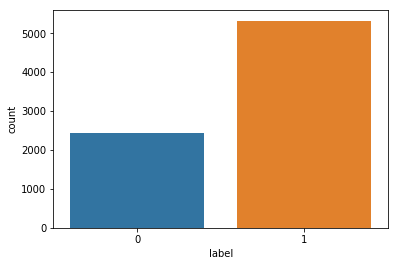

In [8]:
sns.countplot(data.label)

In [9]:
def func(item):
    words = jieba.cut(item)
    return '/'.join(words)


data['review'] = data['review'].apply(func)
neg_len = (data['label'] == 0).sum()
data = data.tail(neg_len * 2)
data.label.value_counts()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 0.829 seconds.
Prefix dict has been built successfully.


1    2443
0    2443
Name: label, dtype: int64

In [10]:
import nltk
import nltk.tokenize as tk
import sklearn.feature_extraction.text as ft

In [11]:
cv = ft.CountVectorizer()
bow = cv.fit_transform(data['review'])
tt = ft.TfidfTransformer()
tfidf = tt.fit_transform(bow).toarray()
tfidf.shape

(4886, 22902)

In [12]:
x, y = tfidf, data['label']
train_x, test_x, train_y, test_y = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.1,
                                                       random_state=7,
                                                       stratify=y)

model = nb.MultinomialNB()
model.fit(train_x, train_y)
predictions = model.predict(test_x)
print(sm.classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       244
           1       0.89      0.87      0.88       245

    accuracy                           0.88       489
   macro avg       0.88      0.88      0.88       489
weighted avg       0.88      0.88      0.88       489



In [13]:
jieba.load_userdict('userdict.txt')
doc = [
    '这家酒店真是垃圾，再也不来了', '这家还不错，值得推荐', '早餐不太好，空调漏水，但是给个好评', '房间真棒，离大马路很近',
    '房间有点脏，厕所漏水，下次再也不来了', '挺好的~', '我不喜欢~'
]
doc = pd.Series(doc)
doc = doc.apply(func)
bow = cv.transform(doc)
test_data = tt.transform(bow)
predictions = model.predict(test_data)
predictions

array([0, 1, 0, 1, 0, 0, 0], dtype=int64)